In [1]:
import pandas as pd
from pandas import *  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

file=r'C:\Users\umut\Desktop\CS210 proje\cs210projectdatas\datas22.csv'
data_education=pd.read_csv(file, sep=';')
data_education_NoMissing=data_education.drop(data_education.columns[1:4], axis=1)
data_education_NoMissing=data_education_NoMissing.drop(data_education_NoMissing.columns[2:], axis=1)
data_education_NoMissing=data_education_NoMissing.dropna()
data_education_NoMissing.rename(columns={"LOCATION":"Country","Education Rate":"EducationRate"}, inplace=True)
data_education_NoMissing.index=list(range(len(data_education_NoMissing)))
data_education_NoMissing.index


file1=r'C:\Users\umut\Desktop\CS210 proje\cs210projectdatas\WomanViolence.csv'
data_violence=pd.read_csv(file1, sep=';')
data_violence=data_violence.drop(['TIME'] , axis=1)
data_violence_NoMissing=data_violence.dropna()
data_violence_NoMissing.rename(columns={"LOCATION":"Country","Rate":"ViolenceRate"}, inplace=True)
data_violence_NoMissing.index=list(range(len(data_violence_NoMissing)))
data_violence_NoMissing.index
data= pd.merge(left=data_education_NoMissing, right=data_violence_NoMissing , on=['Country'] , how= 'left')


file2=r'C:\Users\umut\Desktop\CS210 proje\cs210projectdatas\ER2.csv'
data_er=pd.read_csv(file2,sep = ';')
data1=pd.merge(left=data , right = data_er,on=['Country'] , how= 'left')
data1=data1.drop(['Country'],axis=1)
data1=data1.dropna()
columnsTitles=["EducationRate","GDPpercapita","ViolenceRate"]
data1=data1.reindex(columns=columnsTitles)
data1=data1.reset_index(drop=True)
data1

,EducationRate,GDPpercapita,ViolenceRate
0,106.3,51733.481920,4
1,80.7,14139.269430,6
2,97.2,5045.769926,11
3,71.0,57543.669060,7
4,63.2,1740.915011,20
5,60.0,5943.034472,9
6,73.4,4855.800481,7
7,60.8,12806.565110,14
8,30.0,3461.781164,16
9,91.8,97199.919100,9


In [2]:
trainData = data1[:52]

testData = data1[52:]
t_features = testData.values[:,:2]
t_targetarray = testData.values[:,2:]

feature_cols = ['EducationRate', 'GDPpercapita']
X = trainData[feature_cols]
y = trainData.ViolenceRate

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

lm.intercept_, lm.coef_

(48.803631295252174, array([-4.59609749e-01,  7.24071191e-05]))

In [3]:
zp = zip(feature_cols, lm.coef_)
dict(zp)

{'EducationRate': -0.4596097491860764, 'GDPpercapita': 7.24071190746736e-05}

In [4]:
lm.predict(t_features)

array([45.11811298, 36.05378731, 47.41141036, 51.13115738, 42.40251562,
       51.76741037, 48.75921675, 22.17438619, 28.22426276, 42.00750119,
       45.75570438, 37.65580607, 30.28213683, 34.35271768, 27.8326619 ,
       44.06378717, 47.34519263, 15.04255337, 31.51246854, 45.78671513,
       49.34376892, 38.98032356, 40.92334388, 46.47620437, 29.87254858,
       47.14403069, 46.29767969])

In [5]:
lm.score(X, y)

0.5523799400521094

In [6]:
lm.score(t_features, t_targetarray)

0.3475873344118954

In [7]:
from sklearn import neighbors
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

data_education = data1.drop(data1.columns[1:], axis=1)
arreducation = data_education["EducationRate"]

data_violence =  data1.drop(data1.columns[0:2], axis=1)
arrviolence = data_violence["ViolenceRate"]
array = []
for i in range (0,79):
    newarr = []
    x = arreducation[i]
    y = arrviolence[i]
    newarr.append(x)
    newarr.append(y)
    array.append(newarr)
trainData = np.array(array)
trainData= trainData.astype(np.float32)
trainData

array([[106.3,   4. ],
       [ 80.7,   6. ],
       [ 97.2,  11. ],
       [ 71. ,   7. ],
       [ 63.2,  20. ],
       [ 60. ,   9. ],
       [ 73.4,   7. ],
       [ 60.8,  14. ],
       [ 30. ,  16. ],
       [ 91.8,   9. ],
       [ 94. ,   9. ],
       [ 91.4,  11. ],
       [ 82.5,  10. ],
       [ 96.9,  10. ],
       [ 75.9,  12. ],
       [ 80.1,  25. ],
       [ 64.1,  12. ],
       [ 73.8,  30. ],
       [ 41.9,  52. ],
       [102.9,   4. ],
       [ 48.5,   9. ],
       [ 24.7,  22. ],
       [ 11.4,  33. ],
       [101.9,   4. ],
       [ 56.7,  15. ],
       [ 79. ,  21. ],
       [ 11.8,  46. ],
       [ 92.3,  12. ],
       [ 57.1,  11. ],
       [ 86.7,  18. ],
       [  5.2,  68. ],
       [ 43.7,   9. ],
       [ 32.8,  31. ],
       [ 54.1,  12. ],
       [ 33.1,  42. ],
       [ 47.2,  22. ],
       [  4.9,  36. ],
       [  8.3,  43. ],
       [ 10.6,  43. ],
       [ 40.2,  14. ],
       [ 59. ,  11. ],
       [ 98.5,  17. ],
       [ 23.3,  34. ],
       [ 16

In [8]:
responses = np.random.randint(0,2,(79,1)).astype(np.float32)

red = trainData[responses.ravel()==0]
blue = trainData[responses.ravel()==1]

colorCode = {0:"Red", 1:"Blue"}
responses.ravel()

array([0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.], dtype=float32)

In [9]:
red

array([[106.3,   4. ],
       [ 97.2,  11. ],
       [ 71. ,   7. ],
       [ 60. ,   9. ],
       [ 73.4,   7. ],
       [ 30. ,  16. ],
       [ 82.5,  10. ],
       [ 80.1,  25. ],
       [ 48.5,   9. ],
       [ 24.7,  22. ],
       [ 56.7,  15. ],
       [ 57.1,  11. ],
       [ 43.7,   9. ],
       [ 32.8,  31. ],
       [ 47.2,  22. ],
       [  4.9,  36. ],
       [  8.3,  43. ],
       [ 40.2,  14. ],
       [  2.5,  54. ],
       [ 66. ,  11. ],
       [  3.6,  90. ],
       [  9.2,  68. ],
       [  3.2,  44. ],
       [ 14. ,  47. ],
       [  1.5,  80. ],
       [ 58.8,   4. ],
       [ 45.3,  25. ],
       [ 20.2,   7. ],
       [ 46.3,  70. ],
       [ 33. ,  39. ],
       [ 11.7,  37. ],
       [ 75.9,  10. ],
       [ 39.2,  20. ],
       [ 21.7,  53. ],
       [ 43.1,  30. ],
       [  4.1,  58. ],
       [  6.5,  42. ]], dtype=float32)

In [10]:
blue

array([[ 80.7,   6. ],
       [ 63.2,  20. ],
       [ 60.8,  14. ],
       [ 91.8,   9. ],
       [ 94. ,   9. ],
       [ 91.4,  11. ],
       [ 96.9,  10. ],
       [ 75.9,  12. ],
       [ 64.1,  12. ],
       [ 73.8,  30. ],
       [ 41.9,  52. ],
       [102.9,   4. ],
       [ 11.4,  33. ],
       [101.9,   4. ],
       [ 79. ,  21. ],
       [ 11.8,  46. ],
       [ 92.3,  12. ],
       [ 86.7,  18. ],
       [  5.2,  68. ],
       [ 54.1,  12. ],
       [ 33.1,  42. ],
       [ 10.6,  43. ],
       [ 59. ,  11. ],
       [ 98.5,  17. ],
       [ 23.3,  34. ],
       [ 16.8,  47. ],
       [ 60. ,  61. ],
       [ 88.5,  22. ],
       [ 80.2,   9. ],
       [  3.5,  62. ],
       [ 85.4,  16. ],
       [ 27.8,  17. ],
       [  2.4,  73. ],
       [  1.1,  62. ],
       [  6.7,  92. ],
       [ 24.4,  16. ],
       [ 45.7,  10. ],
       [  4.6,  32. ],
       [  6.8,  56. ],
       [  7.7,  60. ],
       [ 18.4,  60. ],
       [  6. ,  43. ]], dtype=float32)

Predicted class is:  [1.] Blue


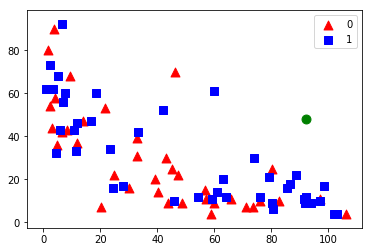

In [11]:
plt.scatter(red[:,0],red[:,1],80,'r','^', label="0")

blue = trainData[responses.ravel()==1]
plt.scatter(blue[:,0],blue[:,1],80,'b','s', label="1")

newcomer = np.random.randint(0,100,(1,2)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(trainData,responses.ravel())

prediction = knn.predict(newcomer)
print("Predicted class is: ",prediction, colorCode[prediction[0]])

plt.legend(loc='upper right')

plt.show()

Predicted 5 new classes are (0 for Red, 1 for Blue): [1 1 1 0 1]


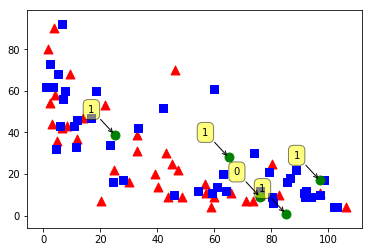

In [12]:
plt.scatter(red[:,0],red[:,1],80,'r','^', label="0")

plt.scatter(blue[:,0],blue[:,1],80,'b','s', label="1")

# nc=5 more new comers
nc = 5
newcomersx = np.random.randint(0,110,(nc,1)).astype(np.float32)
newcomersy = np.random.randint(0,45,(nc,1)).astype(np.float32)

newcomers = []
for i in range (0, nc):
    mynewarray = []
    mynewarray.append(newcomersx[i][0])
    mynewarray.append(newcomersy[i][0])
    newcomers.append(mynewarray)
newcomers = np.array(newcomers)
newcomers = newcomers.astype(np.float32)


plt.scatter(newcomers[:,0],newcomers[:,1],80,'g','o')

knn = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='minkowski', p=2)
knn.fit(trainData,responses.ravel())

# The results also will contain nc labels.
predictions = knn.predict(newcomers).astype(int)
print("Predicted",nc,"new classes are (0 for Red, 1 for Blue):",predictions,)

for label, x, y in zip(predictions, newcomers[:, 0], newcomers[:, 1]):
    plt.annotate(label,xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()